## Draw training results

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
%matplotlib inline

In [2]:
def get_values(fname):

    train_ce = []
    train_smoothl1 = []
    val_ce = []
    val_smoothl1 = []

    with open(fname) as f:
        for line in f:
            split = line.split(' ')
            if len(split) == 2:
                if 'Train-CrossEntropy' in split[1]:
                    train_ce.append(float(split[1].split('=')[1][:-1]))
                    
                if 'Train-SmoothL1' in split[1]:
                    train_smoothl1.append(float(split[1].split('=')[1][:-1]))

                if 'Validation-CrossEntropy' in split[1]:
                    val_ce.append(float(split[1].split('=')[1][:-1]))

                if 'Validation-SmoothL1' in split[1]:
                    val_smoothl1.append(float(split[1].split('=')[1][:-1]))
                    
    return train_ce, train_smoothl1, val_ce, val_smoothl1

def get_plots(nets):
    fnames=[]
    tr_accs = []
    tr_l1s=[]
    val_accs = []
    val_objs_accs = []
    val_ls = []
    nets_path = []
    nets_name = []
    
    for net in nets:
        for item in os.listdir(os.path.join(os.getcwd(), net)):
            fnames.append(item)
            nets_path.append(net)
    
    for fname, net in zip(fnames, nets_path):
        tr_acc, tr_l1, val_acc, val_l1 = get_values(net+fname)
        
        tr_accs.append(tr_acc)
        tr_l1s.append(tr_l1)
        
        # take only validation 
        val_accs.append(val_acc)
        val_ls.append(val_l1)
        nets_name.append(net.split('/')[3])

    figsize=(10,5)
    plt.figure(figsize=figsize)
    for acc, fname, net_name in zip(val_accs, fnames, nets_name):
        plt.plot(acc[:150], label=net_name)
    plt.legend(loc='best')
    plt.title('Validation Cross-entropy')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

    plt.figure(figsize=figsize)
    for acc, fname, net_name in zip(val_ls, fnames, nets_name):
        plt.plot(acc[:150], label=net_name)
    plt.legend(loc='best')
    plt.title("Validation Smooth L1 Loss")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

net1 = '../mxnet-ssd/model/caffenet/logs/'
net2 = '../mxnet-ssd/model/squeezenet/logs/'
net3 = '../mxnet-ssd/model/resnet/logs/'
net4 = '../mxnet-ssd/model/spectral/logs/'

nets = [net1]

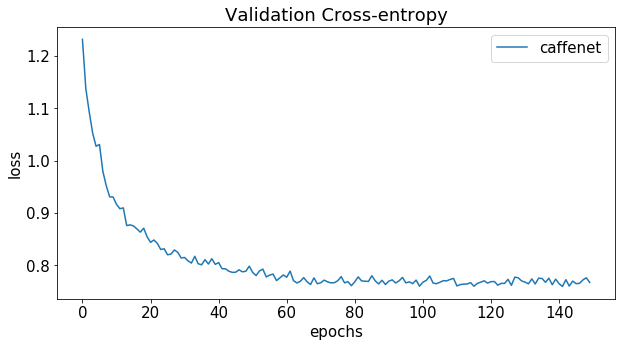

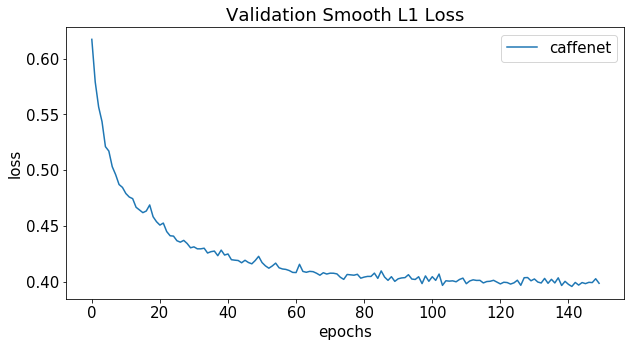

In [6]:
get_plots(nets)

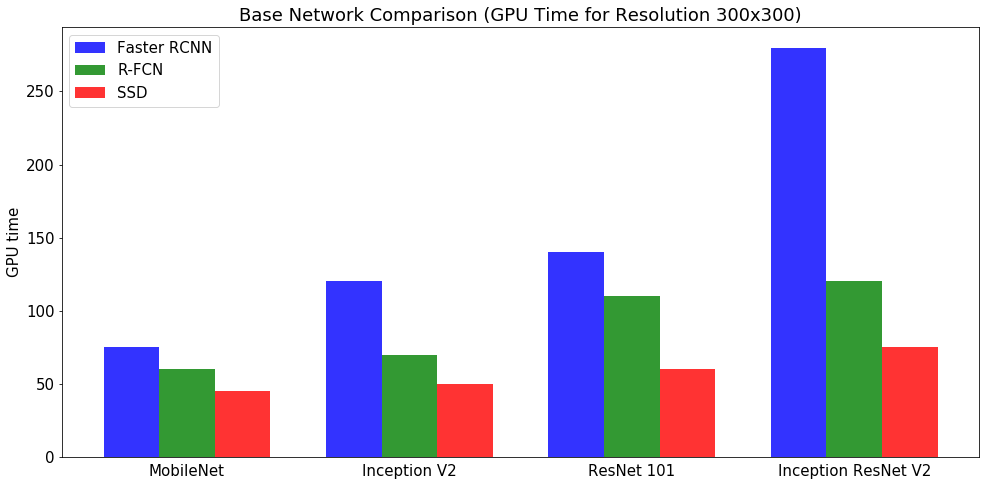

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
faster_rcnn = (75, 120, 140, 280)
r_fcn = (60, 70, 110, 120)
ssd  =  (45, 50, 60, 75)
 
# create plot
fig, ax = plt.subplots(figsize=(14,7))

index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, faster_rcnn, bar_width, alpha=opacity, color='b', label='Faster RCNN')
rects2 = plt.bar(index + bar_width, r_fcn, bar_width, alpha=opacity, color='g', label='R-FCN')
rects3 = plt.bar(index + 2*bar_width, ssd, bar_width, alpha=opacity, color='r', label='SSD')

plt.xlabel('')
plt.ylabel('GPU time')
plt.title('Base Network Comparison (GPU Time for Resolution 300x300)')
plt.xticks(index+0.25, ('MobileNet', 'Inception V2', 'ResNet 101', 'Inception ResNet V2'))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on')  # labels along the bottom edge are off
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Create fusion schemes with Graphviz

In [ ]:
# http://matthiaseisen.com/articles/graphviz/
import mxnet as mx
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz as gv
import functools
graph = functools.partial(gv.Graph, format='svg')
digraph = functools.partial(gv.Digraph, format='svg')

def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

def apply_styles(graph, styles):
    graph.graph_attr.update(('graph' in styles and styles['graph']) or {})
    graph.node_attr.update(('nodes' in styles and styles['nodes']) or {})
    graph.edge_attr.update(('edges' in styles and styles['edges']) or {})
    return graph


styles = {
    'graph': {
#         'label': 'A Fancy Graph',
#         'fontsize': '16',
#         'fontcolor': 'white',
#         'bgcolor': '#333333',
        'rankdir': 'TB',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'oval',
        'fontcolor': 'black',
        'color': '#8dd3c7',
#         'style': 'filled',
#         'fillcolor': '#006699',
    },
#     'edges': {
#         'style': 'dashed',
#         'color': 'white',
#         'arrowhead': 'open',
#         'fontname': 'Courier',
#         'fontsize': '12',
#         'fontcolor': 'white',
#     }
}

# style_input = {
#     'graph': {
#         'style': 'filled',
#         'color': 'white',
#         'fontsize': '16',
#         'fontcolor': 'white',
#         'bgcolor': '#333333',
#     },
#     'nodes': {
#         'fontname': 'Helvetica',
#         'shape': 'oval',
#         'fontcolor': 'black',
#         'color': 'black',
#         'style': 'filled',
#         'fillcolor': '#8dd3c7',
#     },
#     'edges': {
#         'style': 'dashed',
#         'color': 'white',
#         'arrowhead': 'open',
#         'fontname': 'Courier',
#         'fontsize': '12',
#         'fontcolor': 'white',
#     }
# }

style_residual = {
     'graph': {
        'style': '',
        'color': 'blue',
        'fontsize': '20',
        'fontcolor': 'black',
    },
    
    'nodes': {
        'fontname': 'Helvetica',
        'fontsize': '10', 
        'shape': 'rect',
        'fontcolor': 'black',
        'color': 'black',
        'style': 'filled',
        'fillcolor': '#80b1d3',
    }
}

In [ ]:
cm = ("#8dd3c7", "#fb8072", "#ffffb3", "#bebada", "#80b1d3", "#fdb462", "#b3de69", "#fccde5")

In [ ]:
input_block = apply_styles(
    add_edges(
        add_nodes(digraph(format='png'),         
                  [('rgb', {'label': 'RGB', 'shape': 'oval'}),
                   ('tir', {'label': 'TIR', 'shape': 'oval'}),
                   ('fm1', {'label': 'Feature maps', 'shape': 'rect'}),
                   ('fm2', {'label': 'Feature maps', 'shape': 'rect'}),
                  ]), 
        [(('rgb', 'fm1')), (('tir', 'fm2'))]),
    {})

fusion_block = apply_styles(
    add_edges(
        add_nodes(digraph(name='cluster0', format='svg'),         
                  [('rgb1', {'label': 'Residual Unit', 'shape': 'rect'}),
                   ('tir1', {'label': 'Residual Unit', 'shape': 'rect'}),
                   ('cf', {'label': 'Convolution Fusion Unit', 
                           'shape': 'rect', 
                           'fillcolor': '#b3de69',
                          'center': '1'})
                  ]), 
        [(('rgb1', 'cf')), (('tir1', 'cf'))]),
    style_residual)

input_block.subgraph(fusion_block)

input_block.edge('rgb', 'rgb1')
input_block.edge('tir', 'tir1')
input_block.edge('cf', 'fm1')
input_block.edge('cf', 'fm2')
input_block.edge('fm1', 'SSD-Extra Layers')
input_block.edge('fm2', 'SSD-Extra Layers')
input_block.render('1.png')

In [ ]:
input_block = apply_styles(
    add_edges(
        add_nodes(digraph(format='png'),         
                  [('rgb', {'label': 'RGB', 'shape': 'oval'}),
                   ('tir', {'label': 'TIR', 'shape': 'oval'}),
                   ('res1', {'label': 'Residual Unit', 'shape': 'rect'}),
                   ('res2', {'label': 'Residual Unit', 'shape': 'rect'}),
                   
                   ('fm1', {'label': 'Residual Unit', 'shape': 'rect'}),
                   ('fm2', {'label': 'Residual Unit', 'shape': 'rect'}),
                  ]), 
        [(('rgb', 'res1')), (('tir', 'res2')), (('res1', 'fm1')), (('res2', 'fm2'))]),
    {})

fusion_block = apply_styles(
    add_edges(
        add_nodes(digraph(name='cluster0', format='svg'),         
                  [('cf', {'label': 'Convolution Fusion Unit', 
                           'shape': 'rect', 
                           'fillcolor': '#b3de69'})
                  ]), 
        [(('fm1', 'cf')), (('fm2', 'cf'))]),
    style_residual)

input_block.subgraph(fusion_block)
input_block.edge('cf', 'SSD-Extra Layers')



input_block.render('2.png')

In [ ]:
gr_input = gv.Digraph(format='svg')
gr_input.node("RGB")
gr_input.node("TIR")
gr_input.node('FM1')
gr_input.node('FM2')


gr_input = gr_input
# nodes_tir =  add_edges(add_nodes(digraph(), 
#                       [('bn', {'label': 'BN'}),
#                        ('relu', {'label': 'ReLU'}),
#                        ('weight', {'label': 'weight'}),
                       
#                        ('bn1', {'label': 'BN'}),
#                        ('relu1', {'label': 'ReLU'}),
#                        ('weight1', {'label': 'weight'}),
#                       ]), [(('bn', 'relu')), 
#                           (('relu', 'weight')),
#                           (('weight', 'bn1')),
#                           (('bn1', 'relu1')),
#                           (('relu1', 'weight1'))])


nodes_rgb = add_nodes(digraph(), [('b', {'label': 'Relu'})])

# gr_tir = add_edges(nodes_tir, [(('A', 'B'))])
gr_tir = nodes_tir


# gr_rgb = add_edges(nodes_rgb, [(('D', 'E'))])
gr_rgb = nodes_rgb

cf = apply_styles(
    add_edges(
        add_nodes(digraph(),         
                  [('M', {'label': 'Concatenation', 'shape': 'oval'}),
                   ('F', {'label': 'Convolution'}),
                  ]), 
        [(('M', 'F'))]),
    style_residual)



gr_input.subgraph(gr_tir)
gr_input.subgraph(gr_rgb)
gr_input.subgraph(cf)

gr_input.edge('TIR', 'A')
gr_input.edge('RGB', 'D')
gr_input.edge('A', 'M')
gr_input.edge('D', 'M')

gr_input.view()

In [ ]:
g7 = add_edges(
    add_nodes(digraph(), [
        ('A', {'label': 'Node A'}),
        ('B', {'label': 'Node B'}),
        'C'
    ]),
    [
        (('A', 'B'), {'label': 'Edge 1'}),
        (('A', 'C'), {'label': 'Edge 2'}),
        ('B', 'C')
    ]
)

g8 = apply_styles(
    add_edges(
        add_nodes(digraph(), [
            ('D', {'label': 'Node D'}),
            ('E', {'label': 'Node E'}),
            'F'
        ]),
        [
            (('D', 'E'), {'label': 'Edge 3'}),
            (('D', 'F'), {'label': 'Edge 4'}),
            ('E', 'F')
        ]
    ),
    {
        'nodes': {
            'shape': 'square',
            'style': 'filled',
            'fillcolor': '#cccccc',
        }
    }
)

In [ ]:
g7.subgraph(g8)
g7.edge('B', 'E', color='red', weight='2')